In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
# files=os.listdir('./data/')
files = os.listdir('./data/')
df = {}

for f in files:
    x = np.load('./data/'+f)
    lr,tau=f.split('lr')[1].split('_tau')
    tau = tau.split('.npy')[0]
    lr = float(lr)
    tau = float(tau)
    df[(lr,tau)] = x
    
# first level column is lr, second is tau
df = pd.DataFrame(df)
df.index.name = 'episode'
df.columns = df.columns.rename("lr", level=0).rename("tau",level=1)

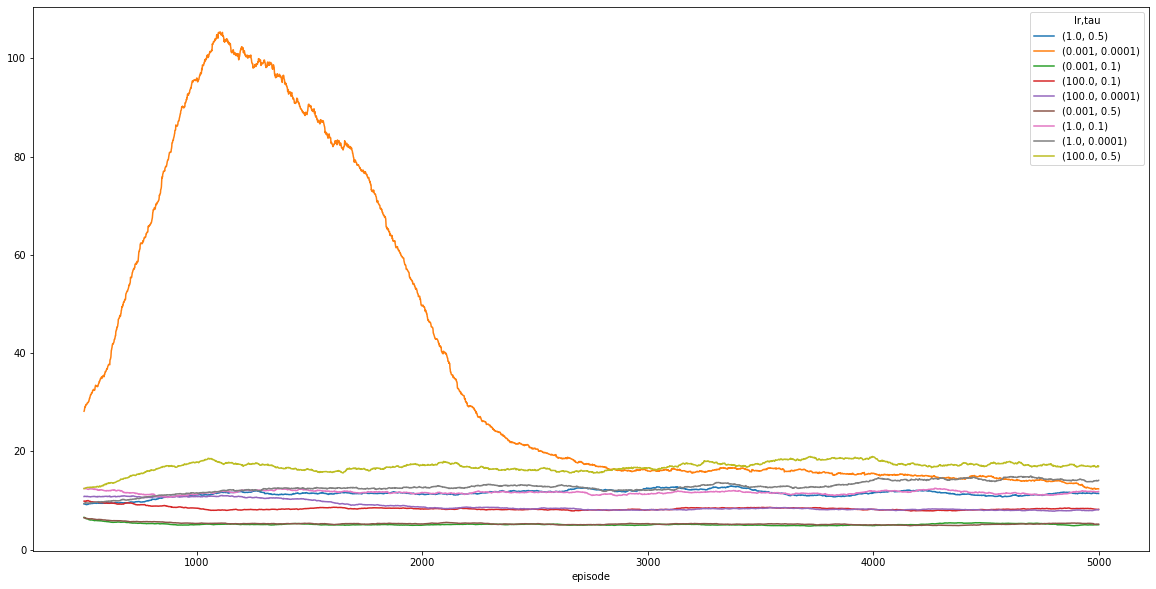

In [3]:
fig,ax=plt.subplots(figsize=[20,10])
# rolling mean
df.rolling(500).mean().plot(ax=ax)
plt.show()

In [4]:
y = np.load('trained_models/CNN2_15000ep_durations.npy')
y = pd.Series(y,name='Durations')
y.index.name='episodes'

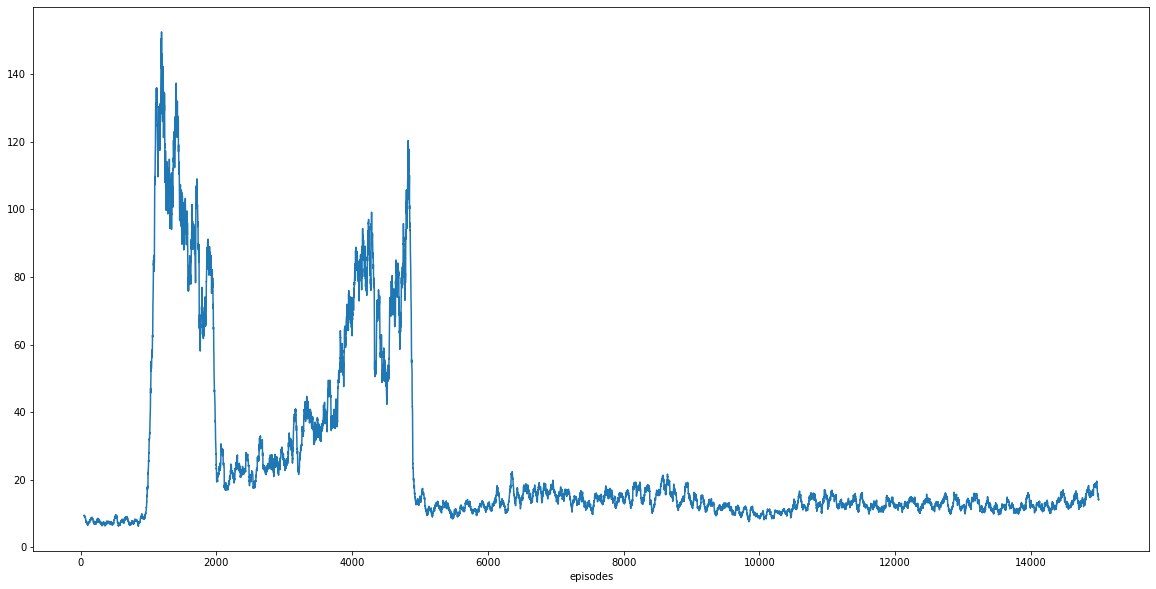

In [6]:
fig,ax=plt.subplots(figsize=[20,10])
y.rolling(50).mean().plot(ax=ax);